<a href="https://colab.research.google.com/github/aurora32s/python_study/blob/master/2022%EB%85%84_1%EC%9B%94_4%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 수들의 합(1789번)

## 문제
서로 다른 N개의 자연수의 합이 S라고 한다. S를 알 때, 자연수 N의 최댓값은 얼마일까?

## 입력
첫째 줄에 자연수 S(1<=S<=4,294,967,295)가 주어진다.

## 출력
첫째 줄에 자연수 N의 최댓값을 출력한다.

In [ ]:
s = int(input()) # 합 S

sum = 0
answer = 0
while sum <= s :
  answer += 1
  sum += answer

print(answer-1)

200
19


# 사탕 게임(3085번)

## 문제
상근이는 어렸을 적에 "봄보니(Bomboni)" 게임을 즐겨했다.

가장 처음에 NxN 크기에 사탕을 채워 놓는다. 사탕의 색은 모두 같지 않을 수도 있다. 상근이는 사탕의 색이 다른 인접한 두 칸을 고른다. 그 다음 고른 칸에 들어있는 사탕을 서로 교환한다. 이제 모두 같은 색으로 이루어져 있는 가장 긴 연속 부분(행 또는 열)을 고르 다음 그 사탕을 모두 먹는다.

사탕이 채워진 상태가 주어졌을 때, 상근이가 먹을 수 있는 사탕의 최대 개수를 구하는 프로그램을 작성하시오.

## 입력
첫째 줄에 보드의 크기 N이 주어진다. (3<=N<=50)

다음 N개 줄에는 보드에 채워져 있는 사탕의 색상이 주어진다. 빨간색은 C, 파란색은 P, 초록색은 Z, 노란색은 Y로 주어진다.

사탕의 색이 다른 인접한 두 칸이 존재하는 입력만 주어진다.

## 출력
첫째 줄에 상근이가 먹을 수 있는 사탕의 최대 개수를 출력한다.

In [ ]:
n = int(input())
maps = [[] for _ in range(n)]

for i in range(n) :
  row = input()
  for column in row :
    maps[i].append(column)

# 자리를 바꿀 수 있는 경우 true 반환
def diff (x,y,nx,ny) :
  if nx<0 or n<=nx or ny<0 or n<=ny :
    return False
  return (maps[y][x] != maps[ny][nx])

def maxRows (y) : # 행의 최대 길이
  color = maps[y][0]
  result = 0
  length = 1
  for x in range(1,n) :
    if maps[y][x] == color :
      length += 1
    else :
      result = max(result, length)
      length = 1
      color = maps[y][x]
  result = max(result, length)
  return result

def maxColumns (x) : # 열의 최대 길이
  color = maps[0][x]
  result = 0
  length = 1
  for y in range(1,n) :
    if maps[y][x] == color :
      length += 1
    else :
      result = max(result, length)
      length = 1
      color = maps[y][x]
  result = max(result, length)
  return result

# 행의 최대 값 구해두기
rows = []
for y in range(n) :
  rows.append(maxRows(y))
# 열의 최대 값 구해두기
columns = []
for x in range(n) :
  columns.append(maxColumns(x))

# 변경된 행, 열 재계산
def switch (x,y,nx,ny) :
  rows[y] = maxRows(y)
  rows[ny] = maxRows(ny)
  columns[x] = maxColumns(x)
  columns[nx] = maxColumns(nx)

answer = 0
dx = [1,0]
dy = [0,1]
for y in range(n) :
  for x in range(n) :
    for dic in range(2) :
      nx = x + dx[dic]
      ny = y + dy[dic]
      if diff(x,y,nx,ny) :
        maps[y][x],maps[ny][nx] = maps[ny][nx],maps[y][x]
        switch(x,y,nx,ny)
        maxRow, maxColumn = max(rows),max(columns)
        answer = max(answer, maxRow, maxColumn)
        maps[y][x],maps[ny][nx] = maps[ny][nx],maps[y][x]
        switch(x,y,nx,ny)

print(answer)

5
YCPZY
CYZZP
CCPPP
YCYZC
CPPZZ
4


# A->B(16953번)

## 문제
정수 A를 B로 바꾸려고 한다. 가능한 연산은 다음과 같은 두 가지이다.
- 2를 곱한다.
- 1을 수의 가장 오른쪽에 추가한다.

A를 B로 바꾸는데 필요한 연산의 최솟값을 구해보자.

## 입력
첫째 줄에 A,B(1<= A < B <= 10^9)가 주어진다.

## 출력
A를 B로 바꾸는데 필요한 연산의 최솟값에 1을 더한 값을 출력한다. 만들 수 없는 경우에는 -1을 출력한다.

In [ ]:
a,b = map(int, input().split())

def bfs () :
  q = list()
  q.append((0,a))

  while q :
    count, num = q.pop(-1)

    if num == b :
      return count + 1
    elif num > b :
      continue
    
    # 1. 2 곱하기
    q.append((count + 1, num * 2))
    # 2. 1을 수의 가장 오른쪽에 추가한다.
    q.append((count + 1, num * 10 + 1))
  
  return -1

print(bfs())

100 40021
5


# 동전 1(2293번)

## 문제
n가지 종류의 동전이 있다. 각각의 동전이 나타내는 가치는 다르다. 이 동전을 적당히 사용해서, 그 가치의 합이 k원이 되도록 하고 싶다. 그 경우의 수를 구하시오, 각각의 동전은 몇 개라도 사용할 수 있다.

사용한 동전의 구성이 같은데, 순서만 다른 것은 같은 경우이다.

## 입력
첫째 줄에 n,k가 주어진다. (1<=n<=100, 1<=k<=10,000) 다음 n개의 줄에는 각각의 동전의 가치가 주어진다. 동전의 가치는 100,000보다 작거나 같은 자연수이다.

## 출력
첫째 줄에 경우의 수를 출력한다. 경우의 수는 2^31보다 작다.

In [ ]:
n, k = map(int, input().split())
nums = [ int(input()) for _ in range(n) ]
dp = [0 for _ in range(k+1)]
dp[0] = 1
for num in nums :
  for i in range(1, k+1) :
    if i-num >= 0 :
      dp[i] += dp[i-num]

print(dp[k])

3 10
1
2
5
10


#단지번호붙이기(2667번)

## 문제
<그림1>과 같이 정사각형 모양의 지도가 있다. 1은 집이 있는 곳을, 0은 집이 없는 곳을 나타낸다. 철수는 이 지도를 가지고 연결된 집의 모임인 단지를 정의하고, 단지에 번호를 붙이려 한다. 여기서 연결되었다는 것은 어떤 집이 좌우, 혹은 아래 위로 다른 집이 있는 경우를 말한다. 대각선상에 집이 있는 경우는 연결된 것이 아니다. <그림2>는 <그림1>을 단지별로 번호를 붙인 것이다. 지도를 입력하여 단지수를 출력하고, 각 단지에 속하는 집의 수를 오름차순으로 정렬하여 출력하는 프로그램을 작성하시오.
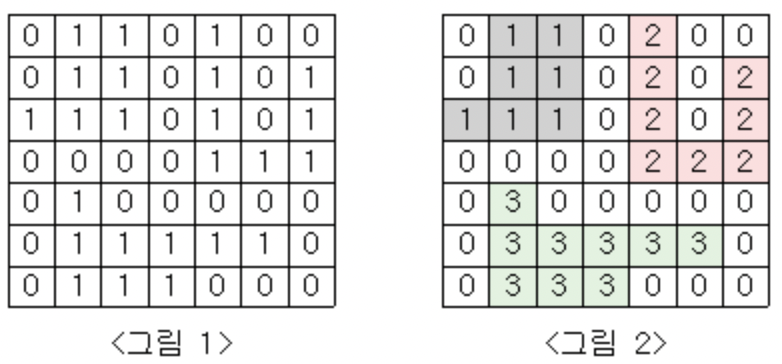

## 입력
첫 번째 줄에는 지도의 크기 N(정사각형이므로 가로와 세로의 크기는 같으며 5<=N<=25)이 입력되고, 그 다음 N 줄에는 각각 N개의 자료(0 혹은 1)가 입력된다.

## 출력
첫 번째 줄에는 총 단지수를 출력하시오. 그리고 각 단지내 집의 수를 오름차순으로 정렬하여 한 줄에 하나씩 출력하시오.

In [ ]:
n = int(input()) # 지도의 크기
maps = [input() for _ in range(n)]

dx = [0,1,0,-1]
dy = [-1,0,1,0]
visited = [[False for _ in range(n)] for _ in range(n)]
results = []
def dfs (x,y) :
  global visited
  visited[y][x] = True
  results[-1] += 1

  for dir in range(4) :
    nx = x + dx[dir]
    ny = y + dy[dir]

    if 0 <= nx < n and 0 <= ny < n and visited[ny][nx] == False and maps[ny][nx] == '1':
      dfs(nx,ny)

for y in range(n) :
  for x in range(n) :
    if visited[y][x] == False:
      if maps[y][x] == '1' :
        results.append(0)
        dfs(x,y)

results.sort()
print(len(results))
for result in results :
  print(result)

7
0110100
0110101
1110101
00001111
0100000
0111110
0111000
3
7
8
9


# 감소하는 수(1038번)

## 문제
음이 아닌 정수 X의 자릿수가 가장 큰 자릿수부터 작은 자릿수까지 감소한다면, 그 수를 감소하는 수라고 한다. 예를 들어, 321과 950은 감소하는 숮만, 322와 958은 아니다. N번째 감소하는 수를 출력하는 프로그램을 작성하시오. 0은 0번째 감소하는 수이고, 1은 1번째 감소하는 수이다. 만약 N번째 감소하는 수가 없다면 -1을 출력한다.

## 입력
첫째 줄에 N이 주어진다. N은 1,000,000보다 작거나 같은 자연수 또는 0이다.

## 출력
첫째 줄에 N번째 감소하는 수를 출력한다.

### 예제 입력 1
> 18
### 예제 출력 1
> 42
## 예제 입력 2
0
## 예제 출력 2
0
## 예제 입력 3
500000
## 예제 출력 3
-1


In [ ]:
import itertools

n = int(input())
decreasedNum = []
for number in range(1,11) :
  for comb in itertools.combinations(range(10),number) :
    comb = list(comb)
    comb.sort(reverse=True)
    decreasedNum.append(int("".join(list(map(str,comb)))))

decreasedNum.sort()
print(decreasedNum[n]) if n < len(decreasedNum) else print(-1)

18
1023
42


In [ ]:
import itertools

n = int(input())
decreasedNum = []
def solve (preNum, currentNum) :
  for num in range(preNum-1, -1, -1) :
    newNum = currentNum * 10 + num
    decreasedNum.append(newNum)
    solve(num, newNum)

for i in range(9, -1, -1) :
  decreasedNum.append(i)
  solve(i, i)

decreasedNum.sort()
print(decreasedNum[n]) if n < len(decreasedNum) else print(-1)

50000
-1


# 가르침 (1062번)

##### 시간제한 : 1초 , 메모리제한 : 128MB 
## 문제
남극에 사는 김지민 선생님은 학생들이 되도록이면 많은 단어를 읽을 수 있도록 하려고 한다. 그러나 지구온난화로 인해 얼음이 녹아서 곧 학교가 무너지기 때문에, 김지민은 K개의 글자를 가르칠 시간 밖에 없다. 김지민은 가르치고 난 후에는, 학생들은 그 K개의 글자로만 이루어진 단어만을 읽을 수 있다. 김지민은 어떤 K개의 글자를 가르쳐야 학생들이 읽을 수 있는 단어의 개수가 최대가 되는지 고민에 빠졌다.

남극언어의 모든 단어는 `anta`로 시작되고, `tica`로 끝난다. 남극언어에 단어는 N개 밖에 없다고 가정한다. 학생들이 읽을 수 있는 단어의 최댓값을 구하는 프로그램을 작성하시오.

## 입력
첫째 줄에 단어의 개수 N과 K가 주어진다. N은 작거나 같은 자연수이고, K는 26보다 작거나 같은 자연수 또는 0이다. 둘째 줄부터 N개의 줄에 남극 언어의 단어가 주어진다. 단어는 영어 소문자로만 이루어져 있고, 길이가 8보다 크거나 같고, 15보다 작거나 같다. 모든 단어는 중복되지 않는다.

## 출력
첫쨰 줄에 김지민이 K개의 글자를 가르칠 떄, 학생들이 읽을 수 있는 단어 개수의 최댓값을 출력한다.

In [ ]:
from itertools import combinations

n, k = map(int, input().split())

# antatica 도 다 못 배우는 경우
if k < 5 :
  print(0)
else :
  k -= 5 # 배울 수 있는 알파벳의 개수
  subfix = {'a','n','t','i','c'}
  alphbet = {key : value for value, key in enumerate((
      set(map(chr, range(ord('a'), ord('z')+1))) - subfix
  ))}

  words = []
  for _ in range(n) :
    tmp = 0
    for c in set(input()) - subfix :
      tmp |= (1<<alphbet[c]) # 각 알파벳에 해당하는 bit on
    words.append(tmp)
  
  answer = 0
  filter = (2**i for i in range(21))
  for comb in combinations(filter, k) :
    test = sum(comb)
    count = 0
    for word in words :
      if test & word == word :
        count += 1
    
    answer = max(answer, count)

  print(answer)

9 8
antabtica
antaxtica
antadtica
antaetica
antaftica
antagtica
antahtica
antajtica
antaktica
3


# 퇴사 2(15486번)

##### 시간제한 : 2초, 메모리제한 : 512MB 
## 문제
상담원으로 일하고 있는 백준이는 퇴사를 하려고 한다.

오늘부터 N+1일째 되는 날 퇴사를 하기 위해서, 남은 N일 동안 최대한 많은 상담을 하려고 한다.

백준이는 비서에게 최대한 많은 상담을 잡으라고 부탁을 했고, 비서는 하루에 하나씩 서로 다른 사람의 상담을 잡아놓았다.

각각의 상담은 상담을 완료하는데 걸리는 기간 Ti와 상담을 했을 때 받을 수 있는 금액 Pi로 이루어져 있다.

N=7인 경우에 다음과 같은 상담 일정표를 보자.

||1일|2일|3일|4일|5일|6일|7일|
|---|---|---|---|---|---|---|---|
|Ti|3|4|1|1|2|4|2|
|Pi|10|20|10|20|15|40|200|

1일에 잡혀있는 상담은 총 3일이 걸리며, 상담했을 때 받을 수 있는 금액은 10이다. 5일에 잡혀있는 상담은 총 2일이 걸리며, 받을 수 있는 금액은 15이다.

상담을 하는데 필요한 기간은 1일보다 클 수 있기 때문에 모든 상담을 할 수 없다. 예를 들어서 1일에 상담을 하게 되면, 2일,3일에 있는 상담은 할 수 없게 된다. 2일에 있는 상담을 하게 되면, 3,4,5,6일에 잡혀있는 상담은 할 수 없다.

또한, N+1일째에는 회사에 없기 때문에, 6,7일에 있는 상담을 할 수 없다.

퇴사 전에 할 수 있는 상담의 최대 이익은 1일,4일,5일에 있는 상담을 하는 것이며, 이 떄의 이익은 10+20+15=45이다.

상담을 적절히 했을 때, 백준이가 얻을 수 있는 최대 수익을 구하는 프로그램을 작성하시오.

## 입력
첫째 줄에 N(1<=N<=1,500,000)이 주어진다.

둘째 줄부터 N개의 줄에는 Ti와 Pi가 공백으로 구분되어서 주어지며, 1일부터 N일까지 순서대로 주어진다.(1<=Ti<=50, 1<=Pi<=1,000)

## 출력
첫째 줄에 백준이가 얻을 수 있는 최대 이익을 출력한다.

In [ ]:
import sys
input = sys.stdin.readline

n = int(input())
time = [0] * (n+2)
cost = [0] * (n+2)

for i in range(1,n+1) :
  t, p = map(int, input().split())
  time[i] = t
  cost[i] = p

answer = 0
dp = [0] * (n+2)
for i in range(1, n+2) :
  answer = max(answer, dp[i])
  if i + time[i] <= n+1 :
    dp[i + time[i]] = max(answer + cost[i], dp[i + time[i]])

print(max(dp))

# 평범한 배날 (12865번)

## 문제
이 문제는 아주 평범한 배낭에 관한 문제이다.

한달 후면 국가의 부름알 받게 되는 준서는 여행을 가려고 한다. 세상과의 단절을 슬퍼하며 최대한 즐기기 위하 여행이기 때문에, 가지고 다닐 배낭 또한 최대한 가치 있게 싸려고 한다.

준서가 여행에 필요하다고 생각하는 N개의 물건이 있다. 각 물건은 무게 W와 가치V를 가지는데, 해당 물건을 배낭에 넣어서 가면 준서가 V만큼 즐길 수 있다. 아직 행군을 해본 적이 없는 준서는 최대 K만큼의 무게만을 넣을 수 있는 배낭만 들고 다닐 수 있다. 준서가 최대한 즐거운 여행을 하기 위해 배낭에 넣을 수 있는 물건들의 가치의 최댓값을 알려주자.

## 입력
첫 줄에 물품의 수 N(1<=N<=100)과 준서가 버틸 수 있는 무게 K(1<=K<=100,000)가 주어진다. 두 번째 줄부터 N개의 줄에 거쳐 각 물건의 무게 W(1<=W<=100,000)와 해당 물건의 가치 V(0<=V<=1,000)가 주어진다.

입력으로 주어지는 모든 수는 정수이다.

## 출력
한 줄에 배낭에 넣을 수 있는 물건들의 가치합의 최댓값을 출력한다.

In [ ]:
n, k = map(int, input().split())
w, v = [0],[0]

for _ in range(n) :
  wi, vi = map(int, input().split())
  w.append(wi)
  v.append(vi)

dp = [[0 for _ in range(k+1)] for _ in range(n+1)]
for i in range(1,n+1) :
  for j in range(1,k+1) :
    if j >= w[i] :
      dp[i][j] = max(dp[i-1][j], dp[i-1][j - w[i]] + v[i])
    else :
      dp[i][j] = dp[i-1][j]
print(dp[n][k])

4 10
5 10
4 40
6 30
3 50
90


In [ ]:
dp

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 13, 13],
 [0, 0, 0, 0, 8, 8, 13, 13],
 [0, 0, 0, 6, 8, 8, 13, 14],
 [0, 0, 0, 0, 0, 12, 13, 14]]

# 음식물 피하기(1743번)

## 문제
코레스코 콘도미니엄 8층은 학생들이 3끼의 식사를 해결하는 공간이다. 그러나 몇몇 비양심적인 학생들의 만행으로 음식물이 통로 중간 중간에 떨어져 있다. 이러한 음식물들은 근처에 있는 것끼리 뭉치게 돼서 큰 음식물 쓰레기가 된다.

이 문제를 출제한 선생님은 개인적으로 이러한 음식물을 실내화에 묻히는 것을 정말 진정으로 싫어한다. 참고로 우리가 구해야 할 답은 이 문제를 낸 조교를 맞추는 것이 아니다.

통로에 떨어진 음식물을 피해가기란 쉬운 일이 아니다. 따라서 선생님은 떨어진 음식물 중에 제일 큰 음식물만은 피해가려고 한다.

선생님을 도와 제일 큰 음식물의 크기를 구해서 "10ra"를 외치지 않게 도와주자.

## 입력
첫쨰 줄에 통로의 세로 길이 N(1<=N<=100)과 가로 길이 M(1<=M<=100) 그리고 음식물 쓰레기의 개수 K(1<=K<=N*M)이 주어진다. 그리고 다음 K개의 줄에 음식물이 떨어진 좌표 (r,c)가 주어진다.

좌표 (r,c)은 r은 위에서부터, c는 왼쪽에서부터가 기준이다. 입력으로 주어지는 좌표는 중복되지 않는다.

## 출력
첫째 줄에 음식물 중 가장 큰 음식물의 크기를 출력하라.

In [ ]:
import sys
sys.setrecursionlimit(10**4)
input = sys.stdin.readline

n,m,k = map(int,input().split())
maps = [[0] * (m+1) for _ in range(n+1)]

for _ in range(k) :
  y,x = map(int, input().split())
  maps[y][x] = 1

dx = [0,1,0,-1]
dy = [-1,0,1,0]
visited = [[False] * (m+1) for _ in range(n+1)]

def dfs (y,x) :
  visited[y][x] = True

  count = 1
  for dir in range(4) :
    ny = y + dy[dir]
    nx = x + dx[dir]
    if 0<ny<=n and 0<nx<=m and maps[ny][nx] == 1 and not visited[ny][nx] :
      count += dfs(ny,nx)
  return count

answer = 0
for y in range(n+1) :
  for x in range(m+1) :
    if maps[y][x] == 1 and not visited[y][x] :
      answer = max(answer, dfs(y,x))

print(answer)

3 4 5
3 2
2 2
3 1
2 3
1 1
4


# 파이프 옮기기 1 (17070번)

## 문제
유현이가 새 집으로 이사했다. 새 집의 크기는 NxN의 격자판으로 나타낼 수 있고, 1x1 크기의 정사각형 칸으로 나누어져 있다. 각각의 칸은 (r,c)로 나타낼 수 있다. 여기서 r은 행의 번호, c는 열의 번호이고, 행과 열의 번호는 1부터 시작한다. 각각의 칸은 빈 칸이거나 벽이다.

오늘의 집 수리를 위해서 파이프 하나를 옮기려고 한다. 파이프는 아래와 같은 형태이고, 2개의 연속된 칸을 차지하는 크기이다.
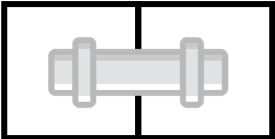

파이프는 회전시킬 수 있으며, 아래와 같이 3가이 방향이 가능하다.

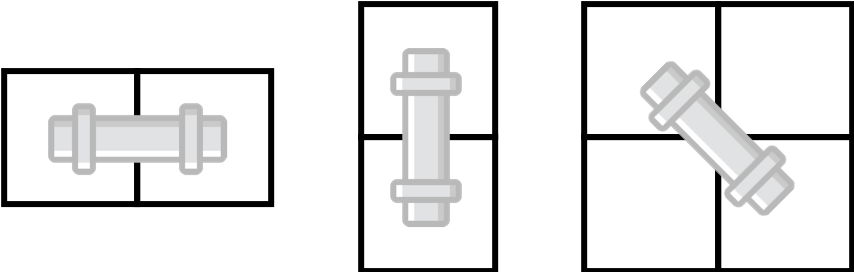



파이프는 매우 무겁기 때문에, 유현이는 파이프를 밀어서 이동시키려고 한다. 벽에는 새로운 벽지를 발랐기 때문에, 파이프가 벽을 긁으면 안 된다. 즉, 파이프는 항상 빈 칸만 차지해야 한다.

파이프를 밀 수 있는 방향은 총 3가지가 있으며, →, ↘, ↓ 방향이다. 파이프는 밀면서 회전시킬 수 있다. 회전은 45도만 회전시킬 수 있으며, 미는 방향은 오른쪽, 아래, 또는 오른쪽 아래 대각선 방향이어야 한다.

파이프가 가로로 놓여진 경우에 가능한 이동 방법은 총 2가지, 세로로 놓여진 경우에는 2가지, 대각성 방향으로 놓여진 경우에는 3가지가 있다.

아래 그림은 파이프가 놓여진 방향에 따라서 이동할 수 있는 방법을 모두 나타낸 것이고, 꼭 빈 칸이어야 하는 곳은 색으로 표시되여져 있다.

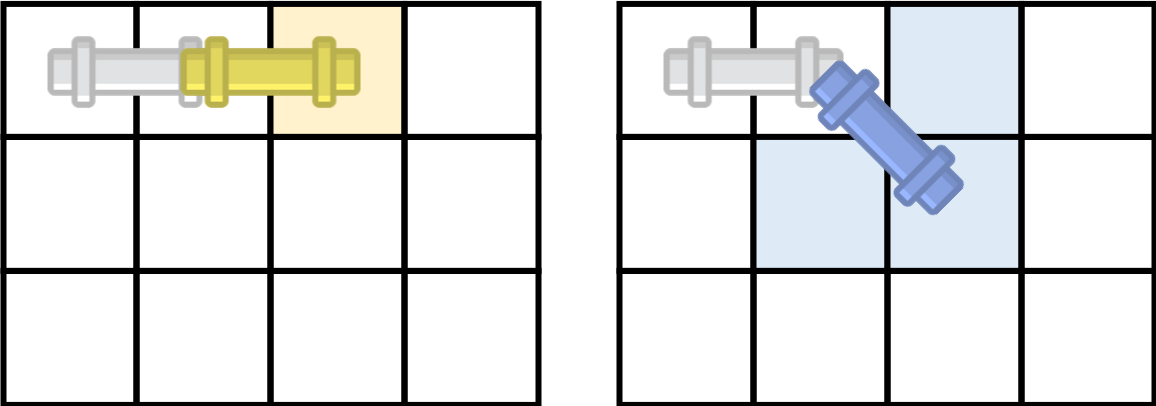

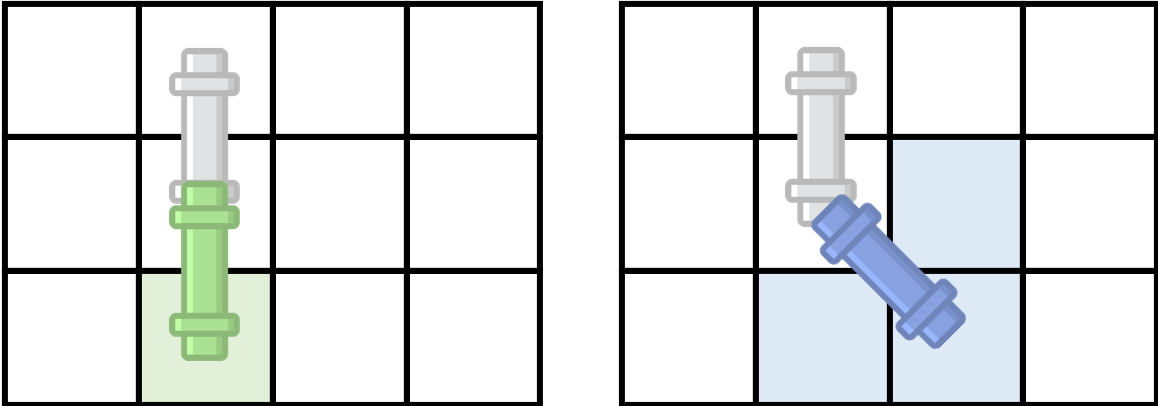

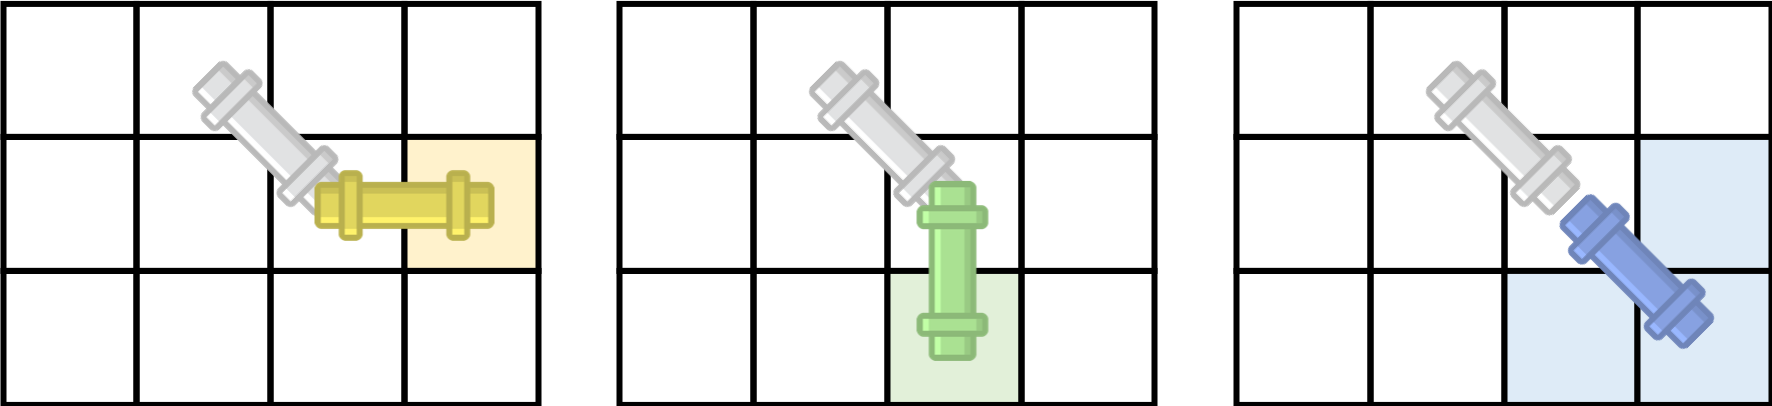

가장 처음에 파이프는 (1,1)와 (1,2)를 차지하고 있고, 방향은 가로이다. 파이프의 한쪽 끝을 (N,N)로 이동시키는 방법의 개수를 구해보자.

## 입력
첫째 줄에 집의 크기 N(3<=N<=16)이 주어진다. 둘째 줄부터 N개의 줄에는 집의 상태가 주어진다. 빈 칸은 0, 벽은 1로 주어진다. (1,1)과 (1,2)는 항상 빈 칸이다.

## 출력
첫째 줄에 파이프의 한쪽 끝을 (N,N)으로 이동시키는 방법의 수를 출력한다. 이동시킬 수 없는 경우에는 0을 출력한다. 방법의 수는 항상 1,000,000보다 작거나 같다.

In [ ]:
n = int(input())
maps = [[ x for x in map(int, input().split())] for _ in range(n)]
dp = [[[0]*3 for _ in range(n)] for _ in range(n)]

for i in range(1, n) :
  if maps[0][i] == 1 :
    break
  dp[0][i][0] = 1

for y in range(1,n) :
  for x in range(2,n) :
    if maps[y][x] != 1 :
      dp[y][x][0] = dp[y][x-1][0] + dp[y][x-1][2]
      dp[y][x][1] = dp[y-1][x][1] + dp[y-1][x][2]
    if maps[y][x] != 1 and maps[y-1][x] != 1 and maps[y][x-1] != 1 :
      dp[y][x][2] = dp[y-1][x-1][0] + dp[y-1][x-1][1] + dp[y-1][x-1][2]

print(sum(dp[n-1][n-1]))

6
0 0 0 0 0 0
0 1 0 0 0 0
0 0 0 0 0 0
0 0 0 0 0 0 
0 0 0 0 0 0
0 0 0 0 0 0
13


In [ ]:
dp

[[[0, 0, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [0, 0, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0]],
 [[0, 0, 0], [0, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 1]],
 [[0, 0, 0], [0, 0, 0], [0, 1, 0], [0, 1, 1], [1, 1, 1]],
 [[0, 0, 0], [0, 0, 0], [0, 1, 0], [0, 2, 1], [1, 2, 2]]]

# 동전 2 (2294번)

|시간제한|메모리제한|
|-----|-----|
|1초(추가 시간 없음)|128MB|

## 문제
n가지 종류의 동전이 있다. 이 동전들을 적당히 사용해서, 그 가치의 합이 k원이 되도록 하고 싶다. 그러면서 동전의 개수가 최소가 되도록 하려고 한다. 각각의 동전은 몇 개라도 사용할 수 있다.

사용한 동전의 구성이 같은데, 순서만 다른 것은 같은 경우이다.

## 입력
첫째 줄에 n,k가 주어진다.(1<=n<=100, 1<=k<=10,000) 다음 n개의 줄에는 각각의 동전의 가치가 주어진다. 동전의 가치는 100,000보다 작거나 같은 자연수이다. 가치가 같은 동전이 여러 번 주어질 수도 있다.

## 출력
첫째 줄에 사용한 동전의 최소 개수를 출력한다. 불가능한 경우에는 -1을 출력한다.

In [ ]:
n, k = map(int, input().split())
numbers = [int(input()) for _ in range(n)]

INF = int(1e9) + 1
dp = [INF] * (k+1)
for num in numbers :
  for i in range(k+1) :
    if i == 0 :
      dp[i] = 0
    elif i - num >= 0:
      dp[i] = min(dp[i], dp[i-num] + 1)

print(-1) if dp[k] == INF else print(dp[k])

5 13
14
15
16
6
8
-1


# 출근 기록 (14238번)
|시간제한|메모리제한|
|-----|-----|
|2초|512MB|

## 문제
스타트링크에는 세명의 직원이 일을 하고 있다. 세 직원의 이름은 강호(A), 준규(B), 수빈(C)이다.

이 회사의 직원은 특별한 룰을 가지고 있는데, 바로 하루에 한 명만 출근한다는 것이다. 3일간의 출근 기록이 "AAC"라는 것은 처음 이틀은 A가 출근했고, 셋째 날엔 C만 출근했다는 뜻이다.

A는 매일 매일 춘그할 수 있다. B는 출근한 다음날은 반드시 쉬어야 한다. C는 출근한 다음날과 다다음날을 반드시 쉬어야 한다. 따라서, 모든 출근 기록이 올바른 것은 아니다. 예를 들어, B는 출근한 다음날 쉬어야 하기 때문에, "BB"는 절대로 나올 수 없는 출근 기록이다.

출근 기록 S가 주어졌을 때, S의 모든 순열 중에서 올바른 출근 기록인 것 아무거나 출력하는 프로그램을 작성하시오.

## 입력
첫째 줄에 출근 기록 S가 주어진다. S의 길이는 50을 넘지 않는다.

## 출력
S의 모든 순열 중에서 올바른 출근 기록인 것을 하나만 출력한다. 만약, 올바른 출근 기록이 업는 경우에는 -1을 출력한다.




In [55]:
ss = input()

n = len(ss)
cnt1 = 0 # a의 개수
cnt2 = 0 # b의 개수
cnt3 = 0 # c의 개수

for s in ss :
  if s == 'A' : cnt1 += 1
  elif s == 'B' : cnt2 += 1
  else : cnt3 += 1

# [a][b][c][pre1][pre2]
dp = [[[[[-1 for _ in range(3)] for _ in range(3)] for _ in range(51)] for _ in range(51)] for _ in range(51)]

answer = ""
def solve (a,b,c,pre1,pre2) :
  global answer
  if a+b+c == n :
    return True

  result = dp[a][b][c][pre1][pre2]
  if result != -1 :
    return result

  if a+1 <= cnt1 :
    if solve(a+1,b,c,0,pre1) == 1 :
      answer = "A" + answer
      dp[a][b][c][pre1][pre2] = 1
      return 1
  
  if b+1 <= cnt2 and pre1 != 1 :
    if solve(a,b+1,c,1,pre1) == 1 :
      answer = "B" + answer
      dp[a][b][c][pre1][pre2] = 1
      return 1
  
  if c+1 <= cnt3 and pre1 != 2 and pre2 != 2 :
    if solve(a,b,c+1,2,pre1) == 1 :
      answer = "C" + answer
      dp[a][b][c][pre1][pre2] = 1
      return 1
  
  dp[a][b][c][pre1][pre2] = 0
  return 0

solve(0,0,0,0,0)
print(-1) if answer == "" else print(answer)

ABC
ABC


In [41]:
dp[0][0][0]

[[1, -1, -1], [1, -1, -1], [1, -1, -1]]

# DFS와 BFS(1260번)

## 문제
그래프를 DFS로 탐색한 결과와 BFS로 탐색한 결과를 출력하는 프로그램을 작성하시오. 단, 방문할 수 있는 정점이 여러 개인 경우에는 정점 번호가 작은 것을 먼저 방문하고, 더 이상 방문할 수 있는 점이 없는 경우 종료한다. 정점 번호는 1번부터 N번까지이다.

## 입력
첫째 줄에 정점의 개수 N(1<=N<=1,000), 간선의 개수 M(1<=M<=10,000), 탐색을 시작할 정점의 번호 V가 주어진다. 다음 M개의 줄에는 간선이 연결하는 두 정점의 번호가 주어진다. 어떤 두 정점 사이에 여러 개의 간선이 있을 수 있다. 입력으로 주어지는 간선은 양방향이다.

## 출력
첫째 줄에 DFS를 수행한 결과를, 그 다음 줄에는 BFS를 수행한 결과를 출력한다. V부터 방문된 점을 순서대로 출력하면 된다.

In [63]:
n,m,k = map(int, input().split())
maps = [[0 for _ in range(n+1)] for _ in range(n+1)]

for _ in range(m) :
  a,b = map(int, input().split())
  maps[a][b] = 1
  maps[b][a] = 1

visited = [False] * (n+1)
result_dfs = []
def dfs (start) :
  result_dfs.append(start)
  visited[start] = True

  for i in range(1,n+1) :
    if maps[start][i] == 1 and visited[i] != True :
      dfs(i)

def bfs (start) :
  visited = [False] * (n+1)
  q = list()
  q.append(start)
  visited[start] = True

  result_bfs = []
  while q :
    node = q.pop(0)
    result_bfs.append(node)

    for i in range(1,n+1) :
      if maps[node][i] == 1 and visited[i] != True :
        q.append(i)
        visited[i] = True
  
  return result_bfs

dfs(k)
for i in result_dfs : print(i, end=" ")
print()
result_bfs = bfs(k)
for i in result_bfs : print(i, end=" ")

4 5 1
1 2
1 3
1 4
2 4
3 4
1 2 4 3 
1 2 3 4 